# Import Required Libraries

In [120]:
library(readr)
library(dplyr)
library(ggplot2)

# Load the dataset & preprocessing

In [121]:
data <- read_csv("/content/diabetes_dataset.csv", show_col_types = FALSE)
data$outcome_categorical <- factor(data$Outcome, labels = c("Non-Diabetic", "Diabetic"))
diabetic = data[data$Outcome == 1, ]
non_diabetic = data[data$Outcome == 0, ]

In [122]:
colnames(data)

[1] "Pregnancies"              "Glucose"                 
 [3] "BloodPressure"            "SkinThickness"           
 [5] "Insulin"                  "BMI"                     
 [7] "DiabetesPedigreeFunction" "Age"                     
 [9] "Outcome"                  "outcome_categorical"

In [123]:
str(data)

spc_tbl_ [768 × 10] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Pregnancies             : num [1:768] 6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : num [1:768] 148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : num [1:768] 72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : num [1:768] 35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : num [1:768] 0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num [1:768] 33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num [1:768] 0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : num [1:768] 50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : num [1:768] 1 0 1 0 1 0 1 0 1 1 ...
 $ outcome_categorical     : Factor w/ 2 levels "Non-Diabetic",..: 2 1 2 1 2 1 2 1 2 2 ...
 - attr(*, "spec")=
  .. cols(
  ..   Pregnancies = col_double(),
  ..   Glucose = col_double(),
  ..   BloodPressure = col_double(),
  ..   SkinThickness = col_double(),
  ..   In

In [124]:
summary(data)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

In [125]:
head(data)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,outcome_categorical
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,148,72,35,0,33.6,0.627,50,1,Diabetic
1,85,66,29,0,26.6,0.351,31,0,Non-Diabetic
8,183,64,0,0,23.3,0.672,32,1,Diabetic
1,89,66,23,94,28.1,0.167,21,0,Non-Diabetic
0,137,40,35,168,43.1,2.288,33,1,Diabetic
5,116,74,0,0,25.6,0.201,30,0,Non-Diabetic


In [126]:
colSums(is.na(data))

Pregnancies                  Glucose            BloodPressure 
                       0                        0                        0 
           SkinThickness                  Insulin                      BMI 
                       0                        0                        0 
DiabetesPedigreeFunction                      Age                  Outcome 
                       0                        0                        0 
     outcome_categorical 
                       0

# Part 1 : Exploratory Analysis

### 1- The average glucose levels among patients with and without diabetes.


In [127]:
sprintf("The average glucose levels among diabetic patients is %.2f and %.2f for non-diabetic patients", mean(diabetic$Glucose), mean(non_diabetic$Glucose))

[1] "The average glucose levels among diabetic patients is 141.26 and 109.98 for non-diabetic patients"

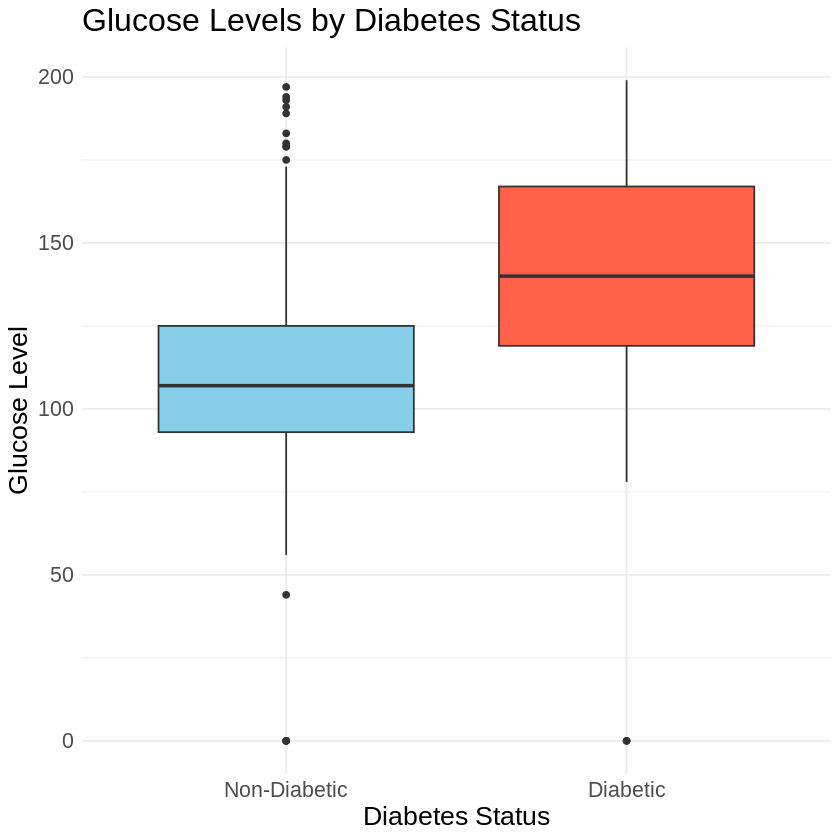

In [128]:
ggplot(data, aes(x = outcome_categorical, y = Glucose)) +
geom_boxplot(fill = c("skyblue", "tomato")) +
labs(title = "Glucose Levels by Diabetes Status", x = "Diabetes Status", y = "Glucose Level") +
theme_minimal() +
theme(text = element_text(size = 16))

### 2- The average age of patients with and without diabetes.

In [129]:
sprintf("The average age levels among diabetic patients is %.0f and %.0f for non-diabetic patients", mean(diabetic$Age), mean(non_diabetic$Age))

[1] "The average age levels among diabetic patients is 37 and 31 for non-diabetic patients"

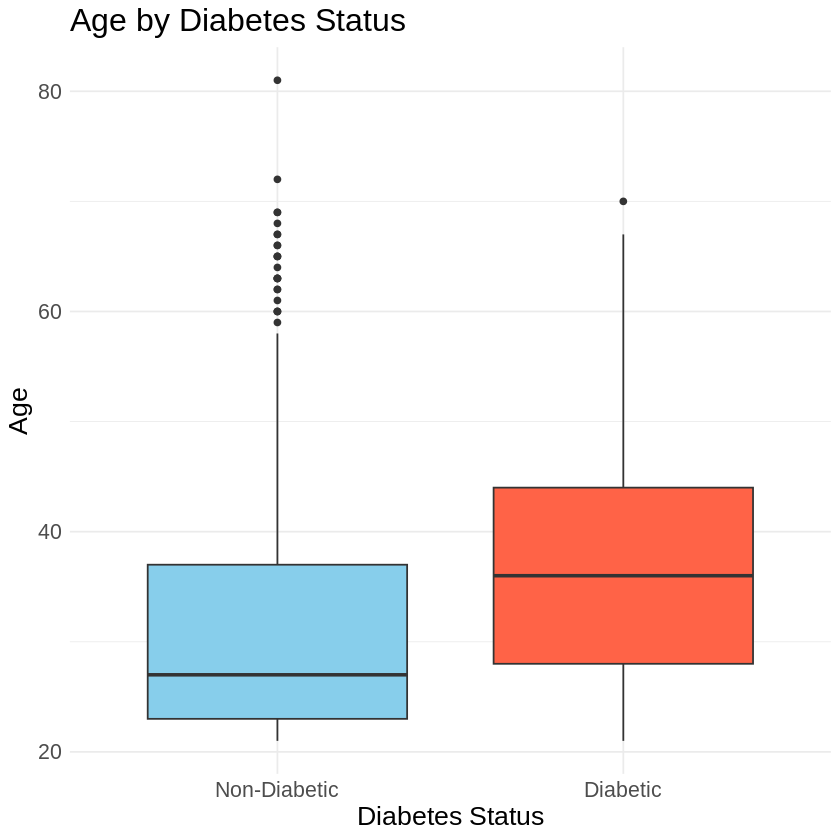

In [130]:
ggplot(data, aes(x = outcome_categorical, y = Age)) +
geom_boxplot(fill = c("skyblue", "tomato")) +
labs(title = "Age by Diabetes Status", x = "Diabetes Status", y = "Age") +
theme_minimal() +
theme(text = element_text(size = 16))

### 3- The average blood pressure measurements across diabetic and non-diabetic groups.

In [131]:
sprintf("The average Blood Pressure levels among diabetic patients is %.2f and %.2f for non-diabetic patients", mean(diabetic$BloodPressure), mean(non_diabetic$BloodPressure))

[1] "The average Blood Pressure levels among diabetic patients is 70.82 and 68.18 for non-diabetic patients"

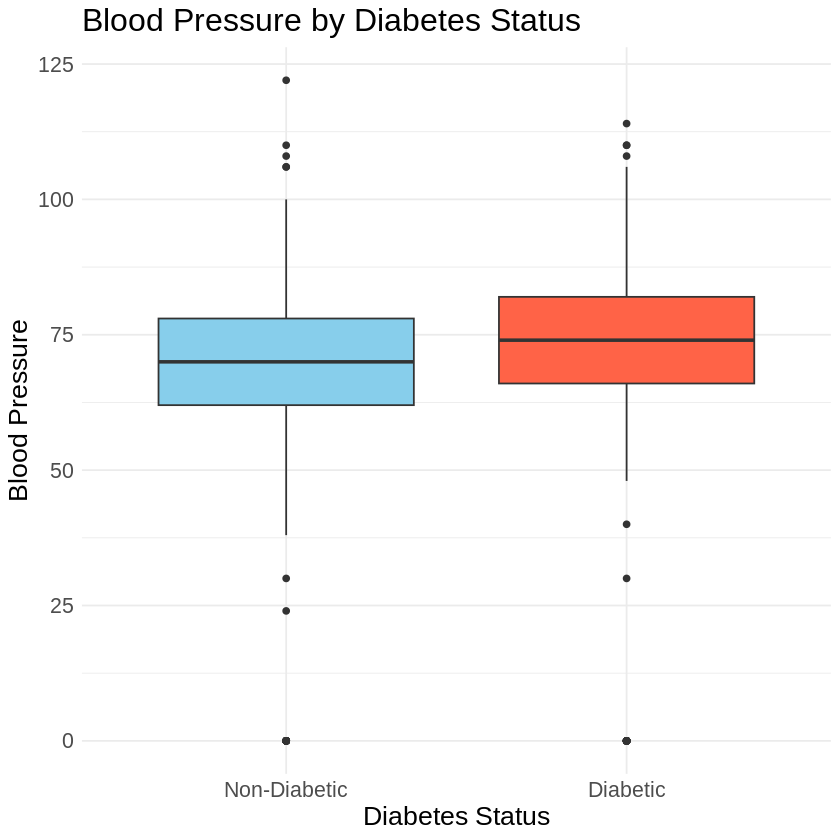

In [132]:
ggplot(data, aes(x = outcome_categorical, y = BloodPressure)) +
geom_boxplot(fill = c("skyblue", "tomato")) +
labs(title = "Blood Pressure by Diabetes Status", x = "Diabetes Status", y = "Blood Pressure") +
theme_minimal() +
theme(text = element_text(size = 16))

### 4- The average BMI of diabetic versus non-diabetic patients.

In [133]:
sprintf("The average BMI Pressure levels among diabetic patients is %.2f and %.2f for non-diabetic patients", mean(diabetic$BMI), mean(non_diabetic$BMI))

[1] "The average BMI Pressure levels among diabetic patients is 35.14 and 30.30 for non-diabetic patients"

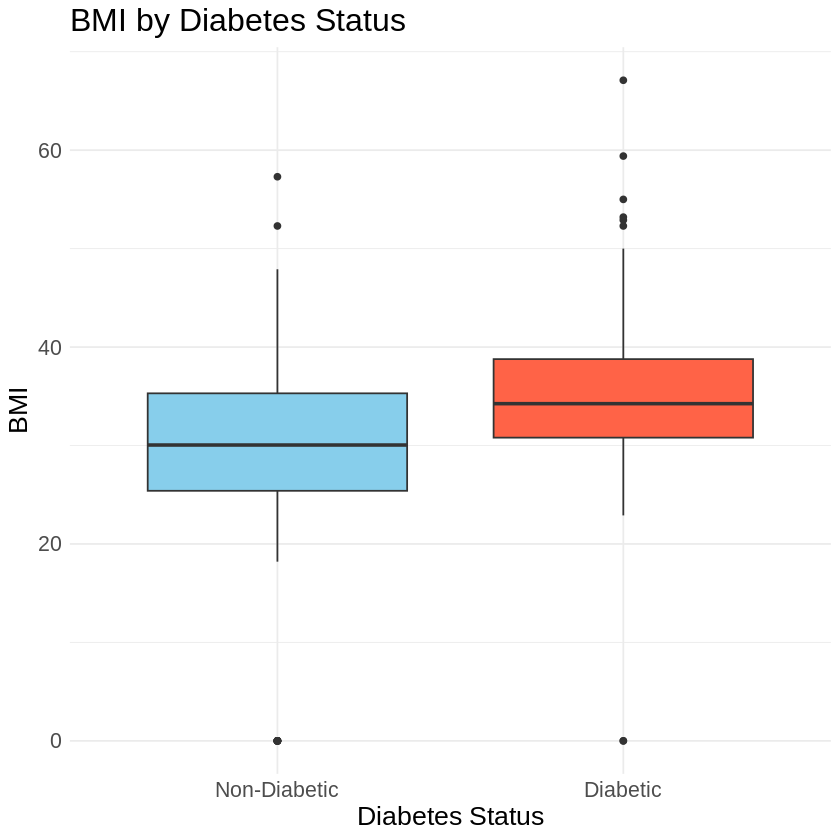

In [134]:
ggplot(data, aes(x = outcome_categorical, y = BMI)) +
geom_boxplot(fill = c("skyblue", "tomato")) +
labs(title = "BMI by Diabetes Status", x = "Diabetes Status", y = "BMI") +
theme_minimal() +
theme(text = element_text(size = 16))

### 5- The rate of diabetes among patients in the dataset.

In [135]:
total_patients <- nrow(data)
diabetic_patients <- nrow(diabetic)

sprintf("The rate of diabetes in the dataset is %.2f%%", (diabetic_patients/total_patients) * 100)

[1] "The rate of diabetes in the dataset is 34.90%"

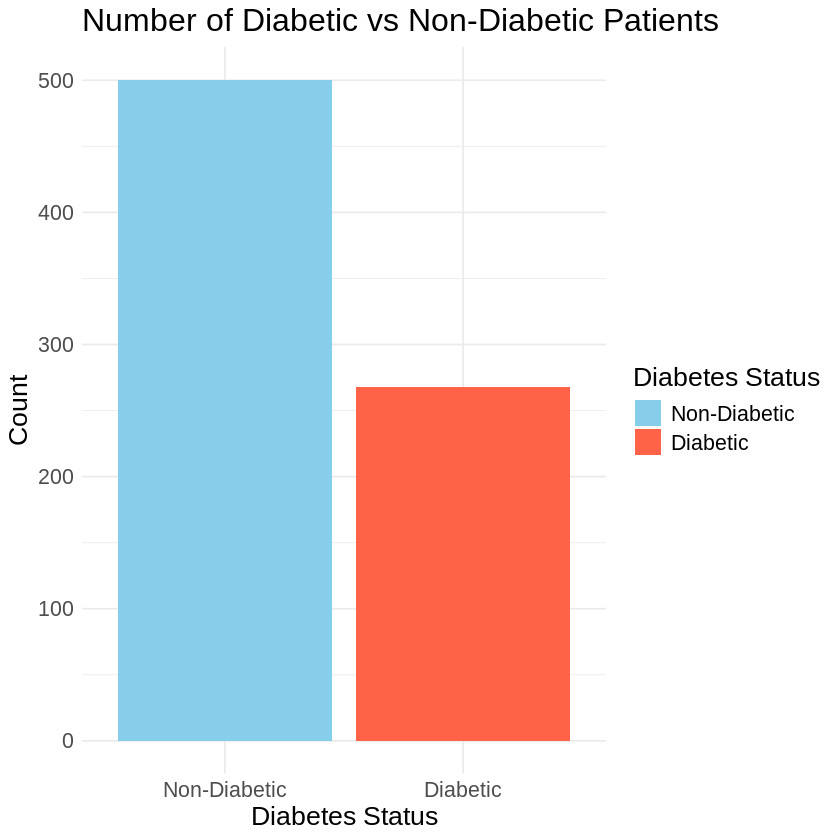

In [136]:
ggplot(data, aes(x = outcome_categorical, fill = outcome_categorical)) +
geom_bar() +
labs(title = "Number of Diabetic vs Non-Diabetic Patients", x = "Diabetes Status", y = "Count",fill = "Diabetes Status") +
scale_fill_manual(values = c("skyblue", "tomato")) +
theme_minimal() +
theme(text = element_text(size = 16))

### 6- The distribution of BMI values among all patients.

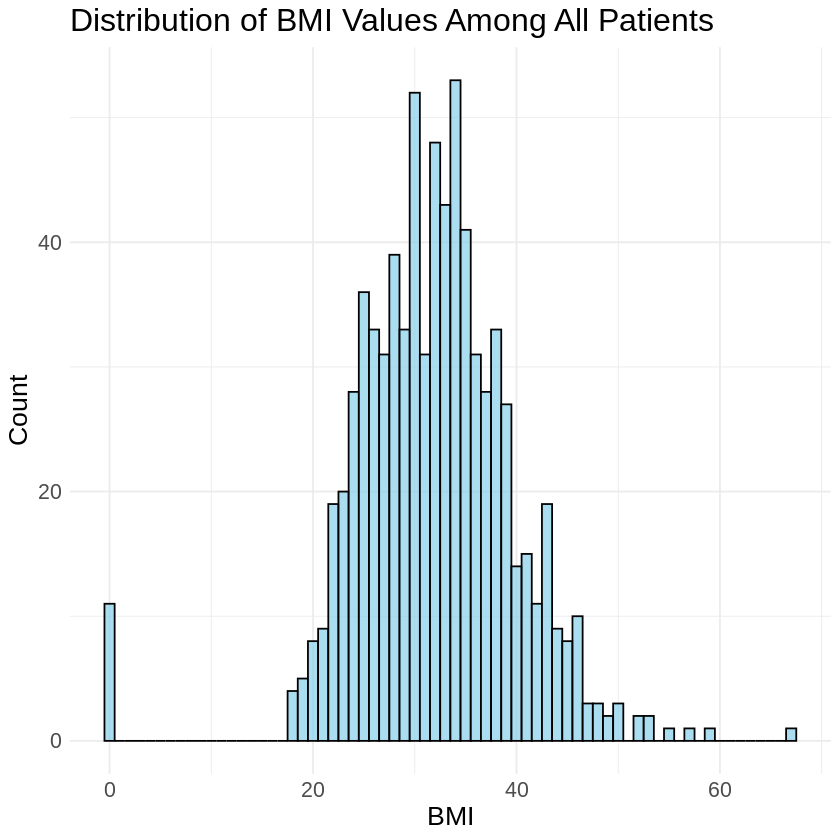

In [137]:
ggplot(data, aes(x = BMI)) +
geom_histogram(binwidth = 1, fill = "skyblue", color = "black", alpha = 0.7) +
labs(title = "Distribution of BMI Values Among All Patients", x = "BMI", y = "Count") +
theme_minimal() +
theme(text = element_text(size = 16))

### 7 - The distribution of Diabetes Pedigree Function (DPF) values for diabetic and non-diabetic patients.


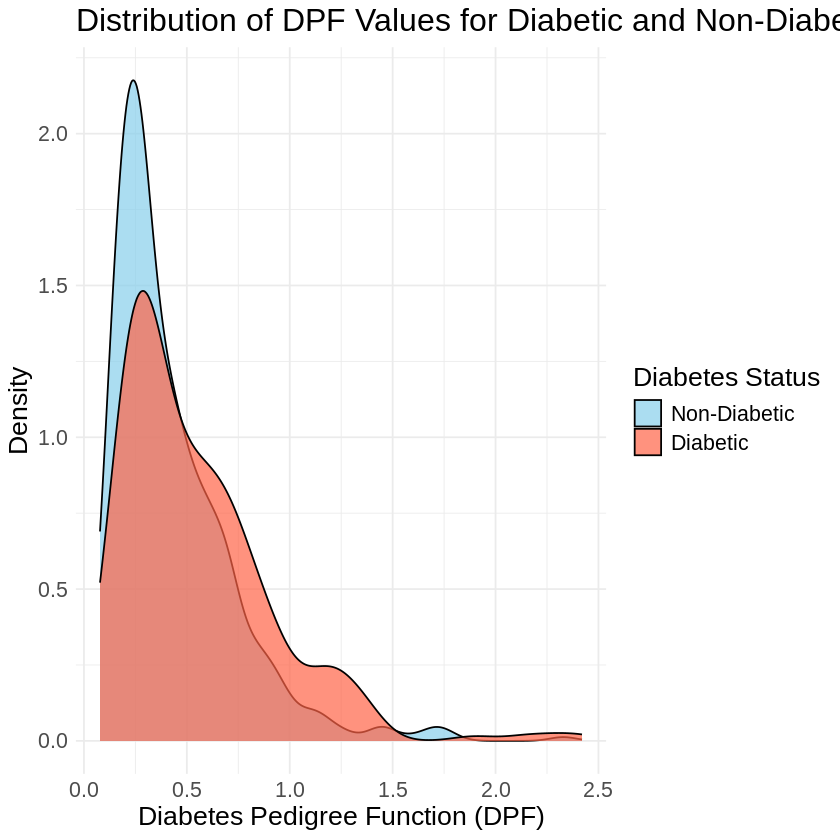

In [138]:
ggplot(data, aes(x = DiabetesPedigreeFunction, fill = outcome_categorical)) +
geom_density(alpha = 0.7) +
labs(title = "Distribution of DPF Values for Diabetic and Non-Diabetic Patients", x = "Diabetes Pedigree Function (DPF)", y = "Density", fill = "Diabetes Status") +
scale_fill_manual(values = c("skyblue", "tomato")) +
theme_minimal() +
theme(text = element_text(size = 16))

### 8 - The relationship between the number of pregnancies and diabetes occurrence.

In [139]:
sprintf("The average number of pregnancies for diabetic patients is %.2f.",  mean(diabetic$Pregnancies))
sprintf("The average number of pregnancies for non-diabetic patients is %.2f.",  mean(non_diabetic$Pregnancies))

[1] "The average number of pregnancies for diabetic patients is 4.87."

[1] "The average number of pregnancies for non-diabetic patients is 3.30."

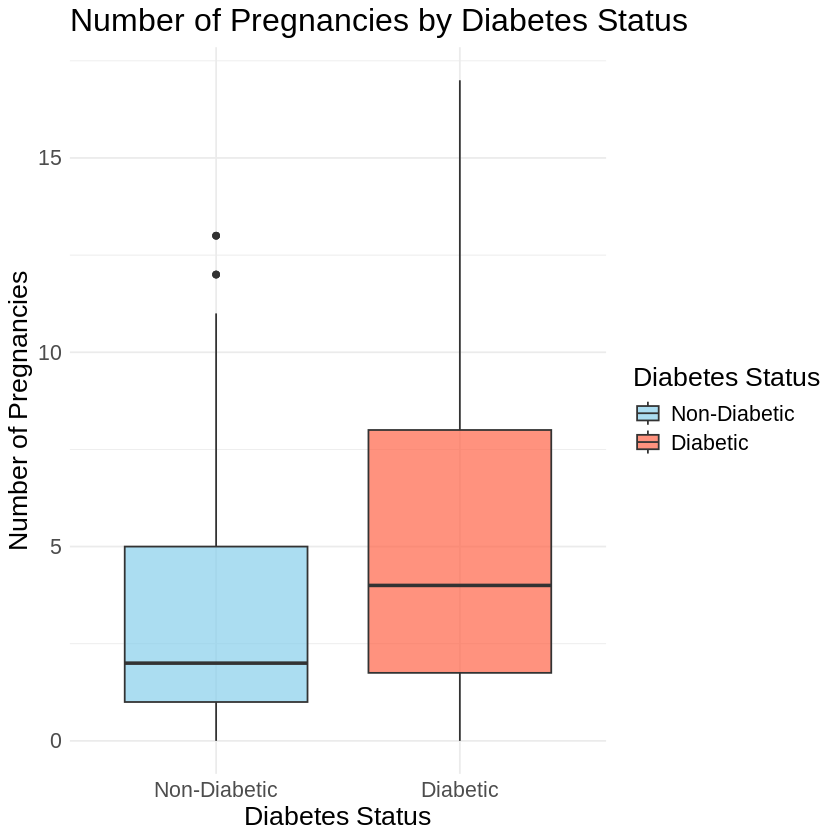

In [140]:
ggplot(data, aes(x = outcome_categorical, y = Pregnancies, fill = outcome_categorical)) +
geom_boxplot(alpha = 0.7) +
labs(title = "Number of Pregnancies by Diabetes Status", x = "Diabetes Status", y = "Number of Pregnancies", fill = "Diabetes Status") +
scale_fill_manual(values = c("skyblue", "tomato")) +
theme_minimal() +
theme(text = element_text(size = 16))

### 9- The correlation between glucose levels and BMI.

In [141]:
correlation <- cor(data$Glucose, data$BMI)
sprintf("The correlation between glucose levels and BMI is %.2f.", correlation)

[1] "The correlation between glucose levels and BMI is 0.22."

### 10 - The trend of glucose levels with age among diabetic and non-diabetic patients.

`geom_smooth()` using formula = 'y ~ x'


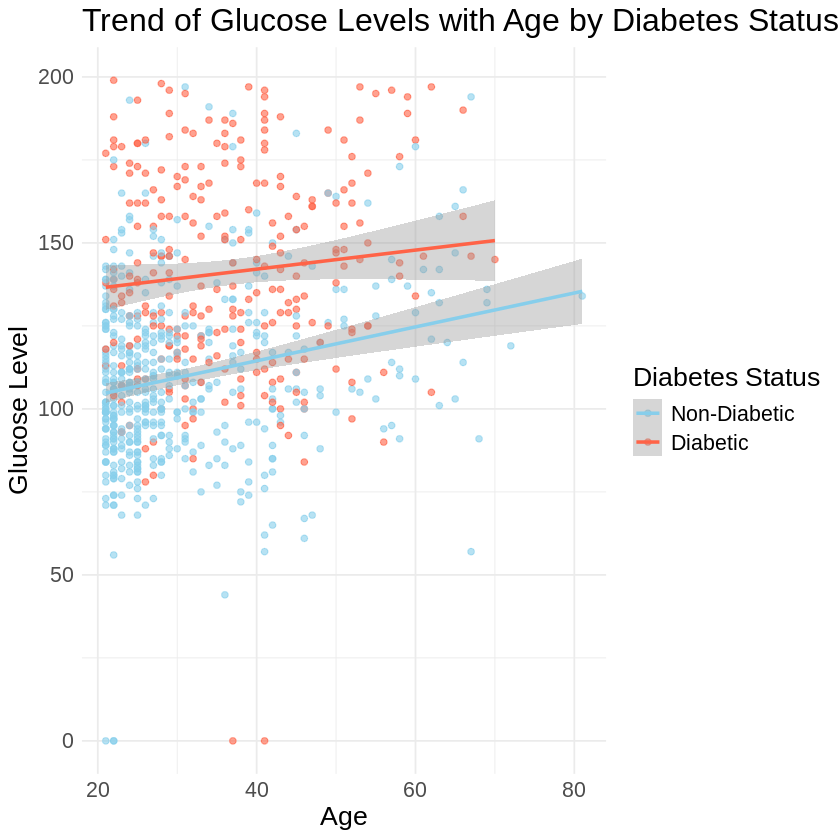

In [142]:
ggplot(data, aes(x = Age, y = Glucose, color = outcome_categorical)) +
geom_point(alpha = 0.6) +
geom_smooth(method = "lm", se = TRUE) +
labs(title = "Trend of Glucose Levels with Age by Diabetes Status", x = "Age", y = "Glucose Level", color = "Diabetes Status") +
scale_color_manual(values = c("skyblue", "tomato")) +
theme_minimal() +
theme(text = element_text(size = 16))

# Part 2: Answering Questions

### 1 - Are higher glucose levels associated with a greater likelihood of diabetes?



> It is obvious from the results that higher glucose level increases the probability of diabetes. Diabetic patients on average have an average glucose level of 141.26 while non-diabetic patients have an average glucose level of 109.98. The t-test has further approved this with a p-value below 0.0001 which means that it has statistical significance. The density plot also provides more evidence.

In [143]:
t_test_result <- t.test(Glucose ~ outcome_categorical, data = data)
print(t_test_result)


	Welch Two Sample t-test

data:  Glucose by outcome_categorical
t = -13.752, df = 461.33, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Non-Diabetic and group Diabetic is not equal to 0
95 percent confidence interval:
 -35.74707 -26.80786
sample estimates:
mean in group Non-Diabetic     mean in group Diabetic 
                  109.9800                   141.2575 



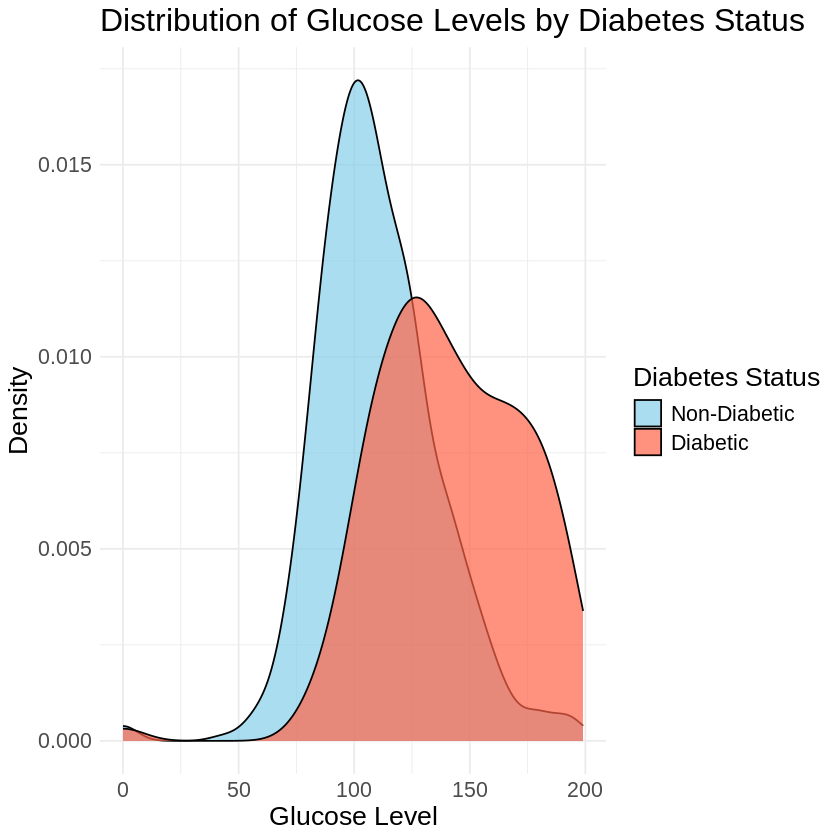

In [144]:
ggplot(data, aes(x = Glucose, fill = outcome_categorical)) +
geom_density(alpha = 0.7) +
labs(title = "Distribution of Glucose Levels by Diabetes Status", x = "Glucose Level", y = "Density", fill = "Diabetes Status") +
scale_fill_manual(values = c("skyblue", "tomato")) +
theme_minimal() +
theme(text = element_text(size = 16))

### 2- Are patients with high glucose concentrations also likely to have higher BMI values?



> The relationship between glucose levels and BMI is positive and weak with a value of 0.22. This means that a BMI increased is associated with slightly elevated glucose levels, but the intensity is not very high. The scatter plot given below shows this trend.



In [145]:
correlation <- cor(data$Glucose, data$BMI, use = "complete.obs")
sprintf("The correlation between Glucose and BMI is %.2f.", correlation)

[1] "The correlation between Glucose and BMI is 0.22."

`geom_smooth()` using formula = 'y ~ x'


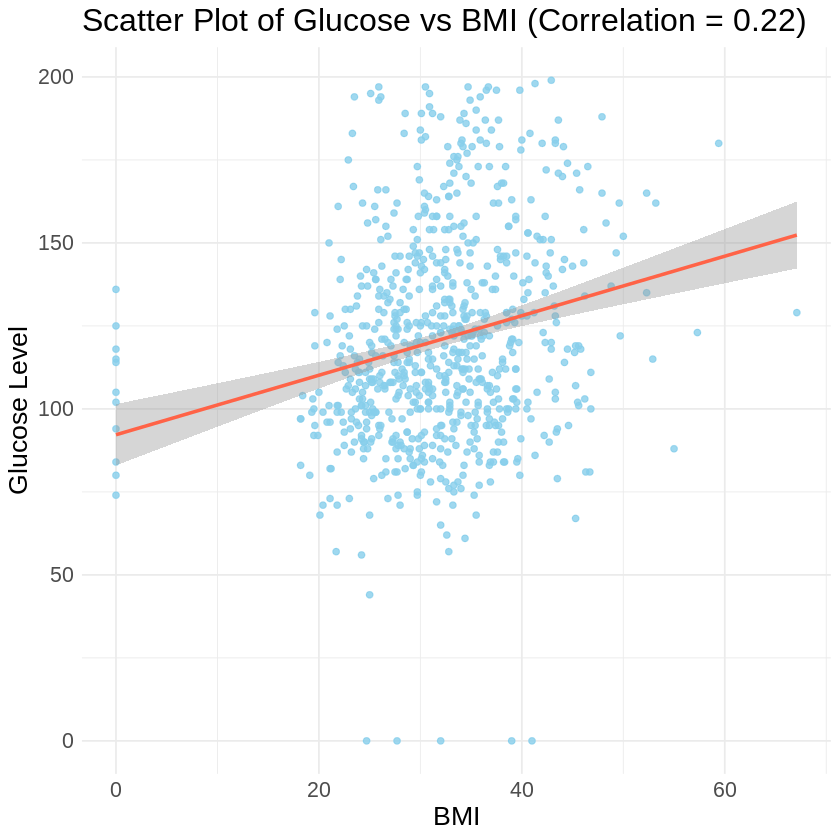

In [146]:
ggplot(data, aes(x = BMI, y = Glucose)) +
geom_point(alpha = 0.8, color = "skyblue") +
geom_smooth(method = "lm", color = "tomato", se = TRUE) +
labs(title = sprintf("Scatter Plot of Glucose vs BMI (Correlation = %.2f)", correlation), x = "BMI", y = "Glucose Level") +
theme_minimal() +
theme(text = element_text(size = 16))

### 3 - Are patients with a higher number of pregnancies at greater risk of developing diabetes?

> Diabetic women have been found to have higher pregnancy rates than women who are not diabetic. This observation raises the possibility of pregnancy history as a risk factor for diabetes.


In [147]:
t_test_result <- t.test(Pregnancies ~ outcome_categorical, data = data)
print(t_test_result)


	Welch Two Sample t-test

data:  Pregnancies by outcome_categorical
t = -5.907, df = 455.96, p-value = 6.822e-09
alternative hypothesis: true difference in means between group Non-Diabetic and group Diabetic is not equal to 0
95 percent confidence interval:
 -2.089219 -1.046125
sample estimates:
mean in group Non-Diabetic     mean in group Diabetic 
                  3.298000                   4.865672 



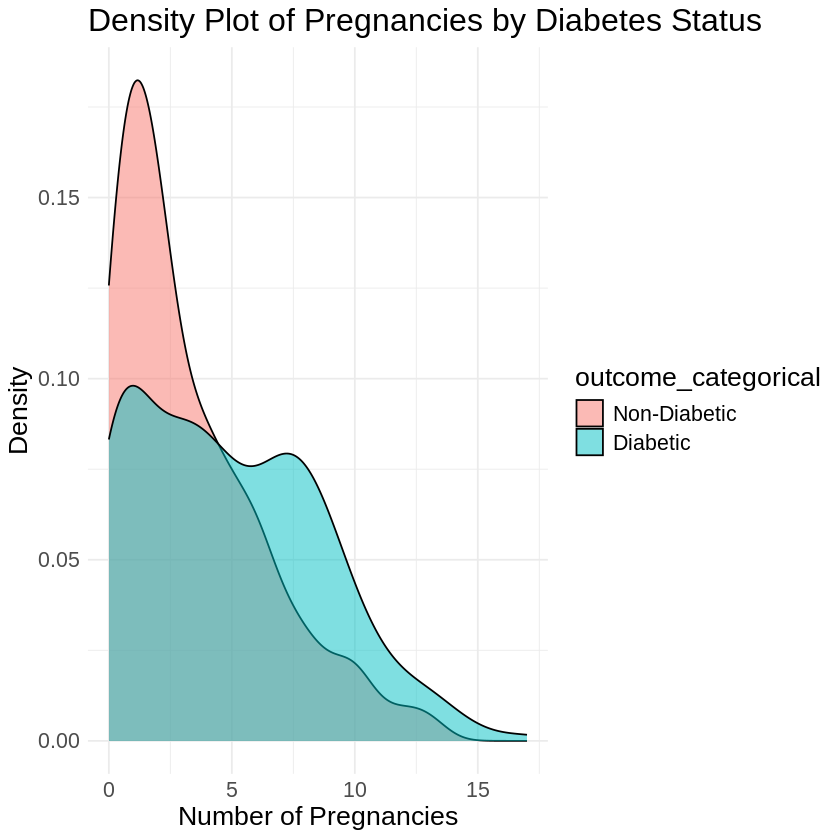

In [148]:
ggplot(data, aes(x = Pregnancies, fill = outcome_categorical)) +
geom_density(alpha = 0.5) +
labs(title = "Density Plot of Pregnancies by Diabetes Status", x = "Number of Pregnancies", y = "Density") +
theme_minimal() +
theme(text = element_text(size = 16))

### 4- Are older patients more likely to have higher insulin concentrations and blood glucose levels?



> there is no direct relationship between age and insulin level where as moderate positive relation was established between age and glucose level meaning higher age group has slightly higher glucose level.


In [149]:
cor_age_insulin <- cor(data$Age, data$Insulin)
cor_age_glucose <- cor(data$Age, data$Glucose)

cat("Correlation between Age and Insulin:", cor_age_insulin, "\n")
cat("Correlation between Age and Glucose:", cor_age_glucose, "\n")

Correlation between Age and Insulin: -0.04216295 
Correlation between Age and Glucose: 0.2635143 


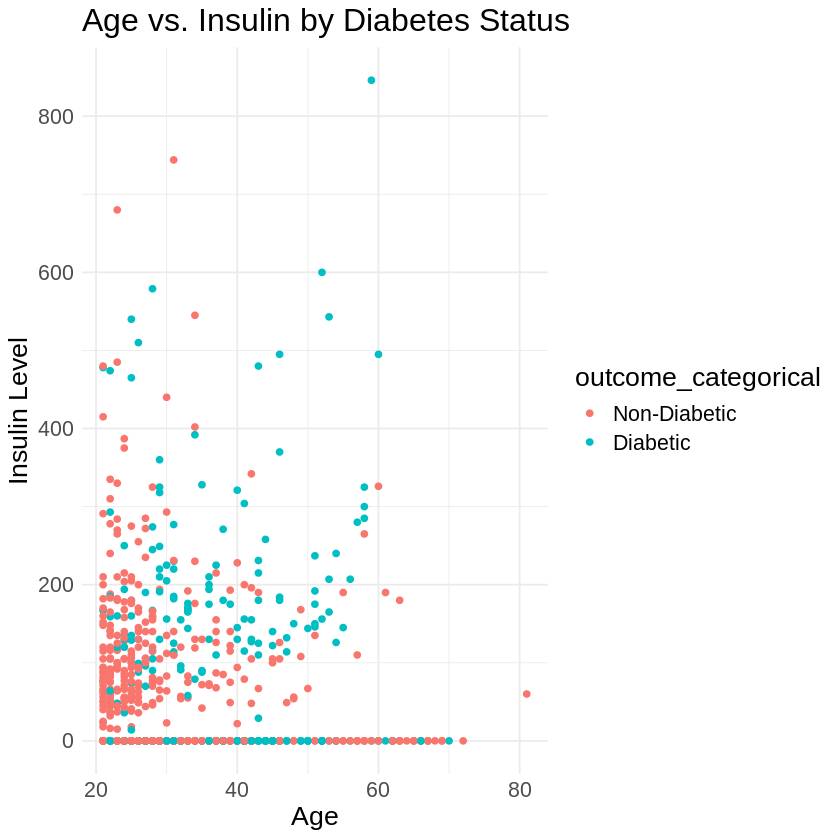

In [150]:
ggplot(data, aes(x = Age, y = Insulin, color = outcome_categorical)) +
geom_point() +
labs(title = "Age vs. Insulin by Diabetes Status", x = "Age", y = "Insulin Level") +
theme_minimal() +
theme(text = element_text(size = 16))

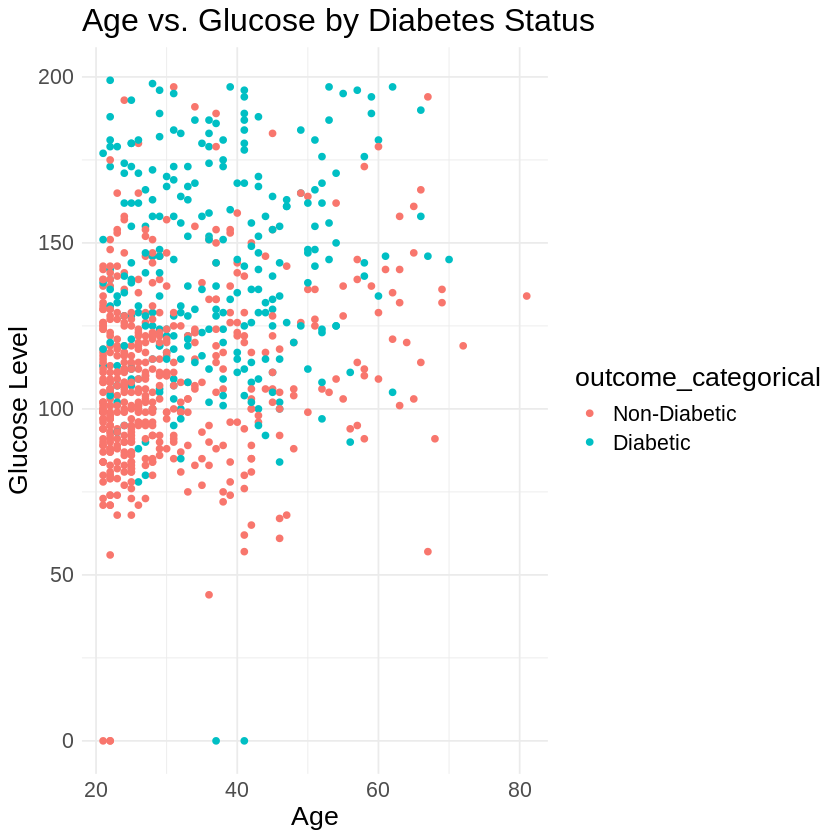

In [151]:
ggplot(data, aes(x = Age, y = Glucose, color = outcome_categorical)) +
geom_point() +
labs(title = "Age vs. Glucose by Diabetes Status", x = "Age", y = "Glucose Level") +
theme_minimal() +
theme(text = element_text(size = 16))

### 5- Can you identify common “risk profiles” for diabetic patients based on key metrics (glucose, BMI, age, etc.)?



> Diabetic patients tend to have higher glucose levels, BMI, and are generally older compared to non-diabetic patients. The "risk profiles" suggest that individuals with glucose levels above 140 mg/dL, BMI above 35, and age over 37 are at a higher risk of diabetes.



In [152]:
summary_stats <- data %>%
  group_by(outcome_categorical) %>%
  summarise(
    Mean_Glucose = mean(Glucose, na.rm = TRUE),
    Mean_BMI = mean(BMI, na.rm = TRUE),
    Mean_Age = mean(Age, na.rm = TRUE),
    SD_Glucose = sd(Glucose, na.rm = TRUE),
    SD_BMI = sd(BMI, na.rm = TRUE),
    SD_Age = sd(Age, na.rm = TRUE)
  )
print(summary_stats)

# A tibble: 2 × 7
  outcome_categorical Mean_Glucose Mean_BMI Mean_Age SD_Glucose SD_BMI SD_Age
  <fct>                      <dbl>    <dbl>    <dbl>      <dbl>  <dbl>  <dbl>
1 Non-Diabetic                110.     30.3     31.2       26.1   7.69   11.7
2 Diabetic                    141.     35.1     37.1       31.9   7.26   11.0


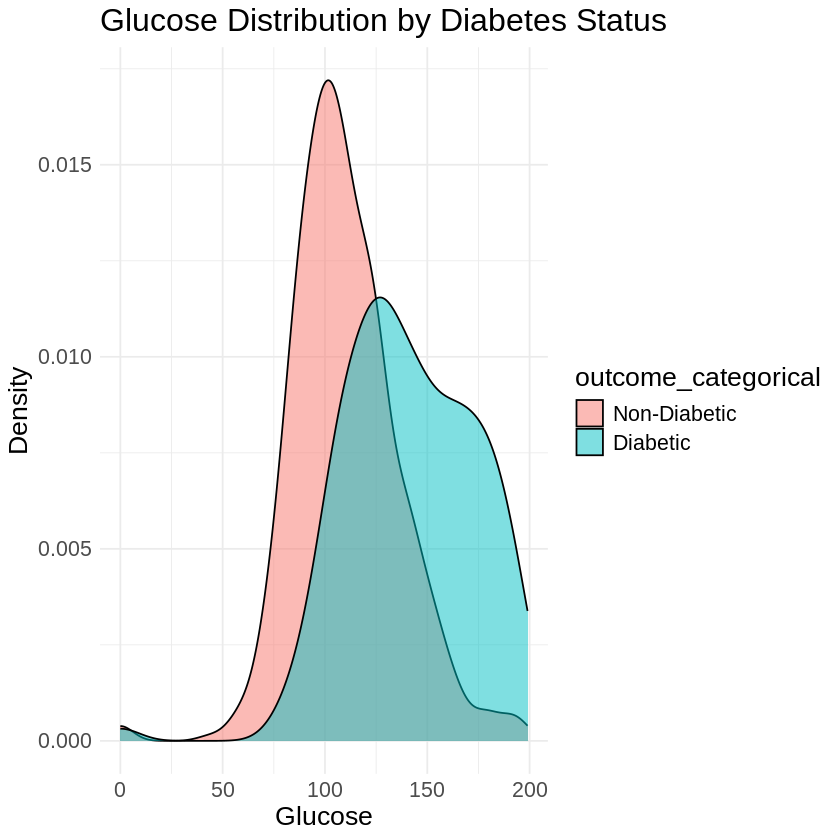

In [153]:
ggplot(data, aes(x = Glucose, fill = outcome_categorical)) +
geom_density(alpha = 0.5) +
labs(title = "Glucose Distribution by Diabetes Status", x = "Glucose", y = "Density") +
theme_minimal() +
theme(text = element_text(size = 16))

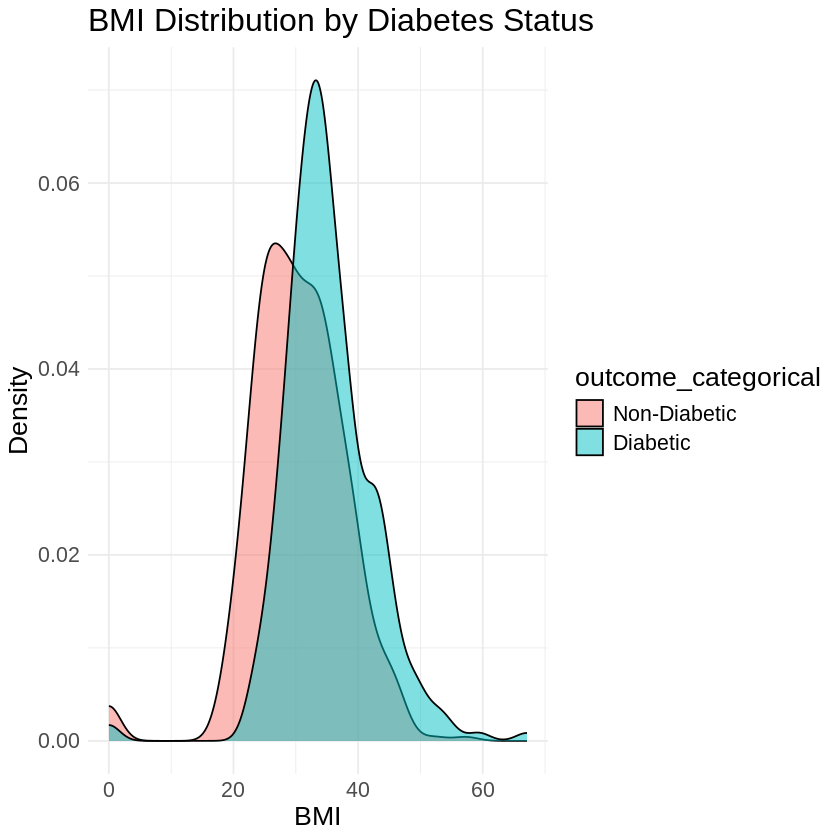

In [154]:
ggplot(data, aes(x = BMI, fill = outcome_categorical)) +
geom_density(alpha = 0.5) +
labs(title = "BMI Distribution by Diabetes Status", x = "BMI", y = "Density") +
theme_minimal() +
theme(text = element_text(size = 16))

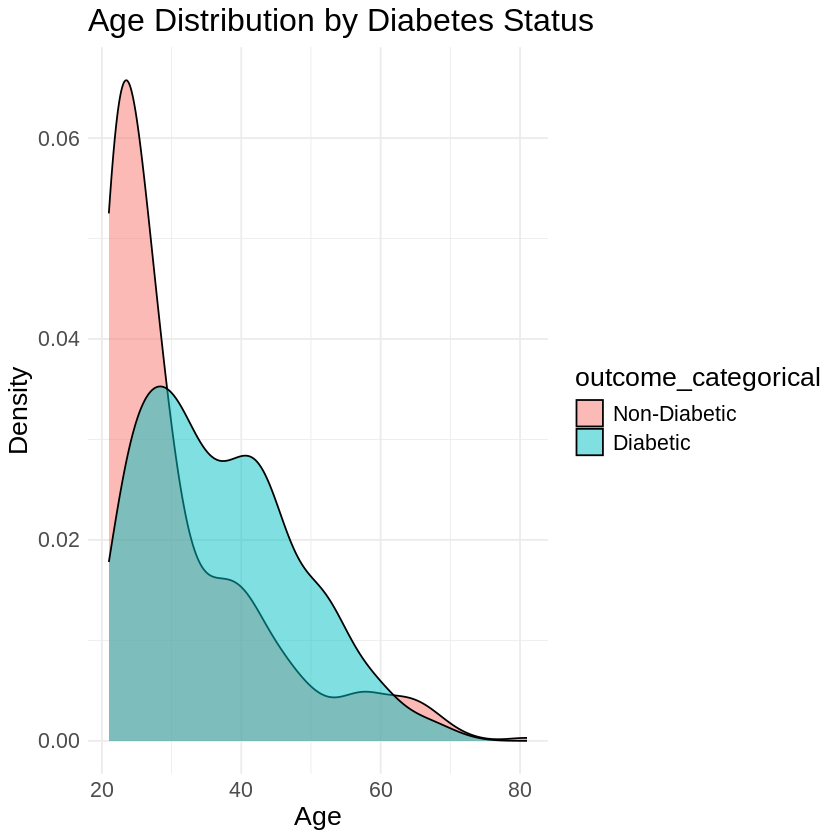

In [155]:
ggplot(data, aes(x = Age, fill = outcome_categorical)) +
geom_density(alpha = 0.5) +
labs(title = "Age Distribution by Diabetes Status", x = "Age", y = "Density") +
theme_minimal() +
theme(text = element_text(size = 16))

### 6 - Does BMI correlate with age for diabetic and non-diabetic patients?



> For non-diabetic patients, there is a very weak positive correlation between BMI and age (correlation = 0.036), indicating almost no relationship. For diabetic patients, there is a weak negative correlation (correlation = -0.188), suggesting that older diabetic patients tend to have slightly lower BMI. However, in both groups, the relationships are not strong enough.


In [156]:
cor_non_diabetic <- cor(non_diabetic$Age, non_diabetic$BMI, use = "complete.obs")
cor_diabetic <- cor(diabetic$Age, diabetic$BMI, use = "complete.obs")

cat("Correlation (Non-Diabetic):", cor_non_diabetic, "\n")
cat("Correlation (Diabetic):", cor_diabetic, "\n")

Correlation (Non-Diabetic): 0.03606979 
Correlation (Diabetic): -0.1880117 


`geom_smooth()` using formula = 'y ~ x'


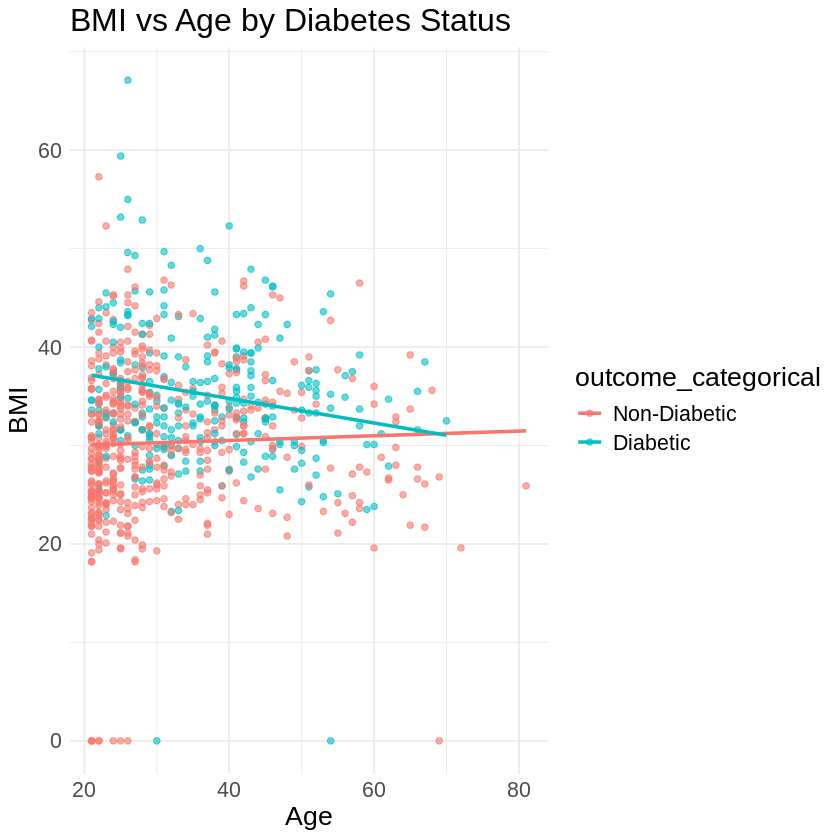

In [157]:
ggplot(data, aes(x = Age, y = BMI, color = outcome_categorical)) +
geom_point(alpha = 0.6) +
geom_smooth(method = "lm", se = FALSE) +
labs(title = "BMI vs Age by Diabetes Status", x = "Age", y = "BMI") +
theme_minimal() +
theme(text = element_text(size = 16))

### 7 - Is there a relationship between the number of pregnancies and BMI?



> The scatterplot shows a weak negative trend between BMI and the number of pregnancies for diabetic patients. However, the relationship is not strong enough to suggest a significant association between these two variables. Diabetic patients appear to have slightly higher BMI values on average regardless of the number of pregnancies.



`geom_smooth()` using formula = 'y ~ x'


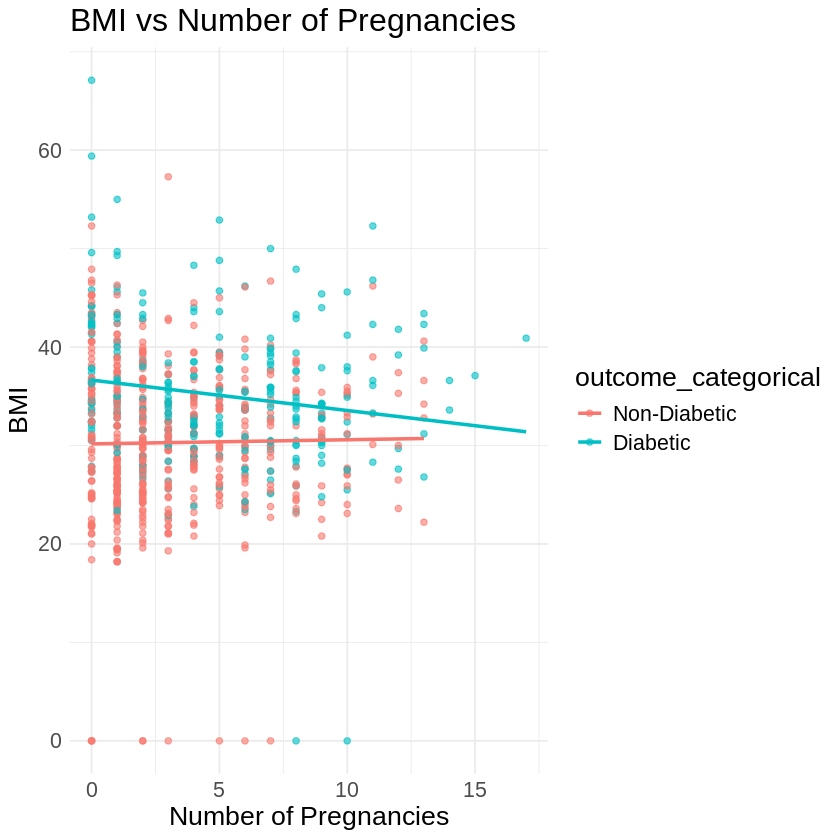

In [158]:
ggplot(data, aes(x = Pregnancies, y = BMI, color = outcome_categorical)) +
geom_point(alpha = 0.6) +
geom_smooth(method = "lm", se = FALSE) +
labs(title = "BMI vs Number of Pregnancies", x = "Number of Pregnancies", y = "BMI") +
theme_minimal() +
theme(text = element_text(size = 16))

### 8- Are higher glucose levels associated with higher blood pressure in diabetic patients?



> The scatterplot for diabetic patients shows a weak positive relationship between glucose levels and blood pressure. This suggests that higher glucose levels might be slightly associated with higher blood pressure, but the correlation appears to be weak.



In [159]:
cor_diabetic <- cor(diabetic$Glucose, diabetic$BloodPressure, use = "complete.obs")
cat("Correlation (Diabetic):", cor_diabetic, "\n")

Correlation (Diabetic): 0.06869888 


`geom_smooth()` using formula = 'y ~ x'


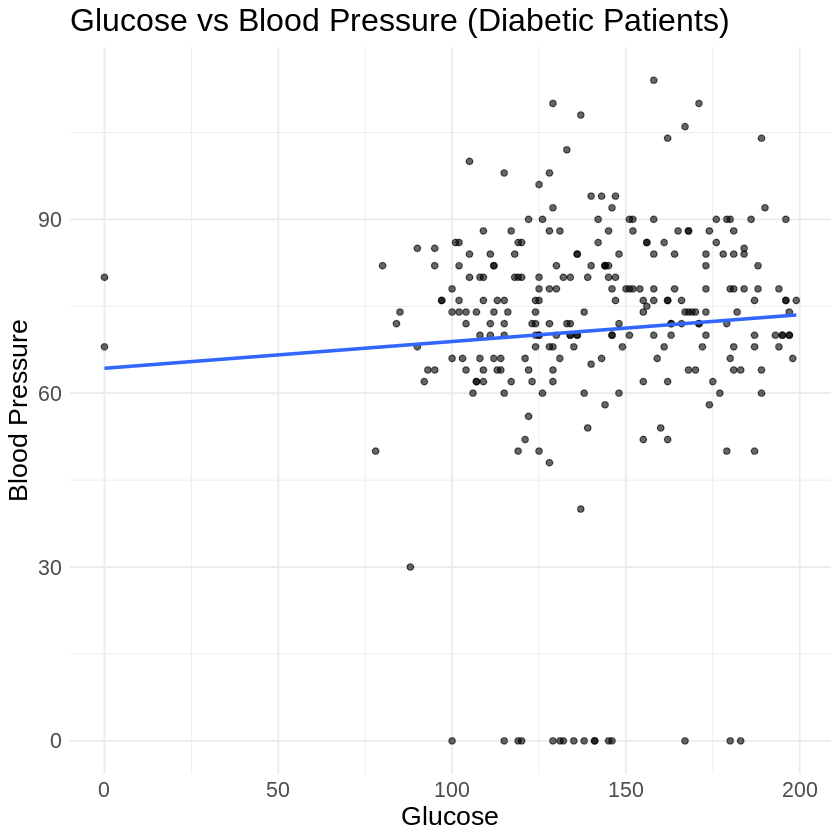

In [160]:
ggplot(diabetic, aes(x = Glucose, y = BloodPressure)) +
geom_point(alpha = 0.6) +
geom_smooth(method = "lm", se = FALSE) +
labs(title = "Glucose vs Blood Pressure (Diabetic Patients)", x = "Glucose", y = "Blood Pressure") +
theme_minimal() +
theme(text = element_text(size = 16))

### 9- Is there a relationship between glucose and age for diabetic and non-diabetic patients?



> The scatterplot shows a positive relationship between glucose levels and age for both diabetic and non-diabetic patients. Non Diabetic patients generally have higher glucose levels than diabetic patients across all age groups.



In [161]:
cor_diabetic <- cor(diabetic$Age, diabetic$Glucose, use = "complete.obs")
cor_non_diabetic <- cor(non_diabetic$Age, non_diabetic$Glucose, use = "complete.obs")

cat("Correlation (Diabetic):", cor_diabetic, "\n")
cat("Correlation (Non Diabetic):", cor_non_diabetic, "\n")

Correlation (Diabetic): 0.09856495 
Correlation (Non Diabetic): 0.2280177 


`geom_smooth()` using formula = 'y ~ x'


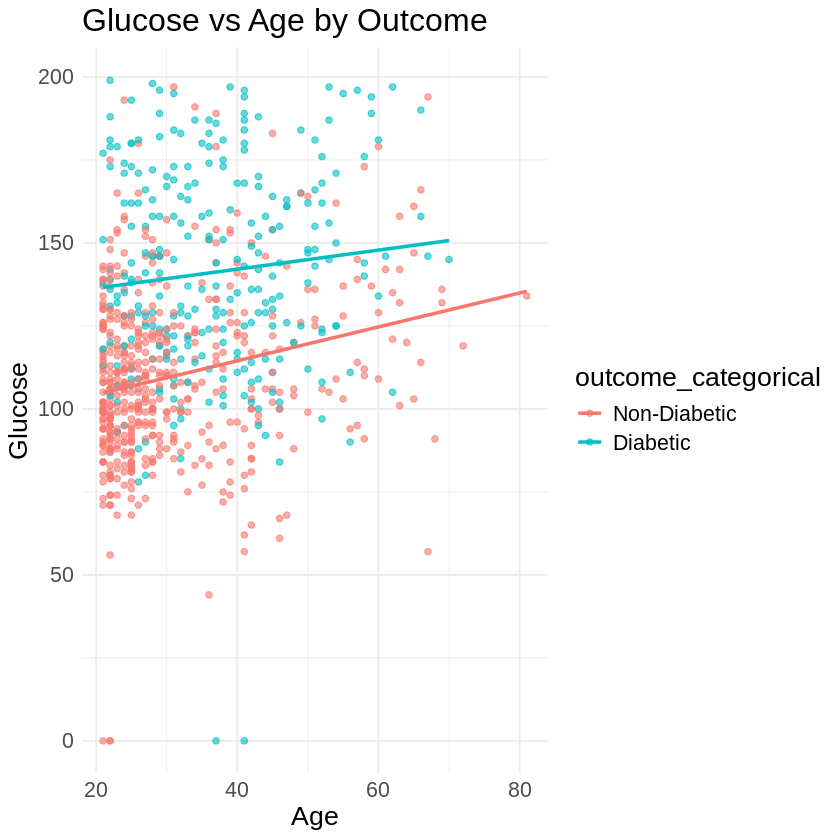

In [162]:
ggplot(data, aes(x = Age, y = Glucose, color = outcome_categorical)) +
geom_point(alpha = 0.6) +
geom_smooth(method = "lm", se = FALSE) +
labs(title = "Glucose vs Age by Outcome", x = "Age", y = "Glucose") +
theme_minimal() +
theme(text = element_text(size = 16))

### 10- Do diabetic patients tend to have higher blood pressure compared to non-diabetic patients?



> The boxplot shows that diabetic patients tend to have slightly higher blood pressure compared to non-diabetic patients. The median blood pressure is higher for diabetics.



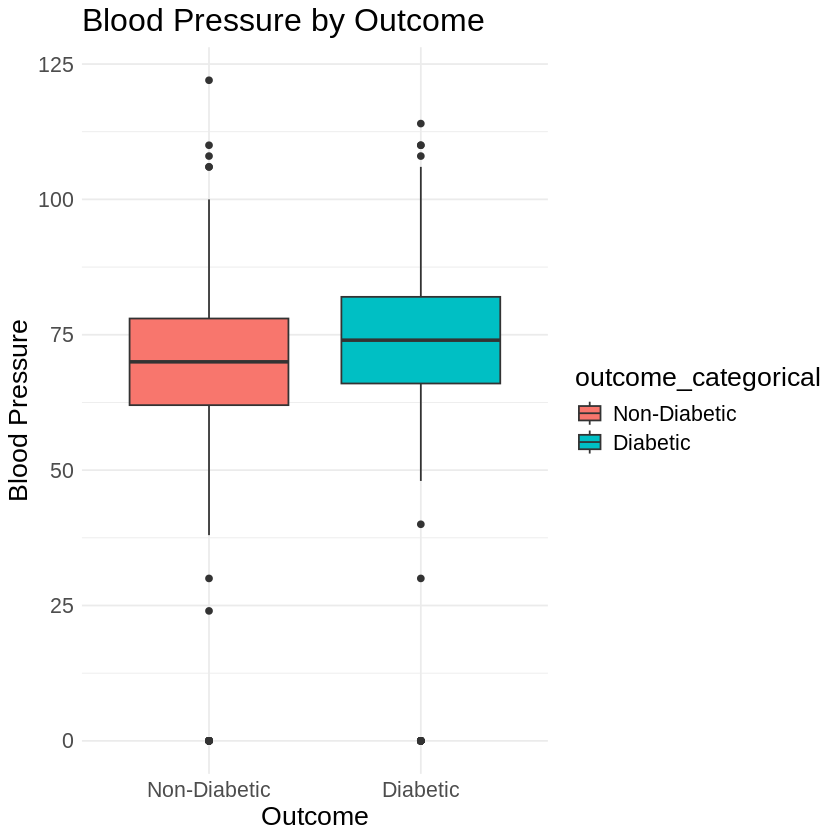

In [163]:
ggplot(data, aes(x = outcome_categorical, y = BloodPressure, fill = outcome_categorical)) +
geom_boxplot() +
labs(title = "Blood Pressure by Outcome", x = "Outcome", y = "Blood Pressure") +
theme_minimal() +
theme(text = element_text(size = 16))

# Part 3: Hypothesis Testing

### 3.1 Formulate a hypothesis test to assess the validity of this claim given the available data:

#### Claim: "There is a significant difference in glucose levels between diabetic and non-diabetic patients."


In [164]:
t_test_result <- t.test(diabetic$Glucose, non_diabetic$Glucose, alternative = "two.sided")
print(t_test_result)


	Welch Two Sample t-test

data:  diabetic$Glucose and non_diabetic$Glucose
t = 13.752, df = 461.33, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 26.80786 35.74707
sample estimates:
mean of x mean of y 
 141.2575  109.9800 



In [165]:
if (t_test_result$p.value < 0.05) {
  cat("Reject the null hypothesis. There is a difference in glucose levels between diabetic and non-diabetic patients.\n")
} else {
  cat("Fail to reject the null hypothesis. There is no significant difference in glucose levels between diabetic and non-diabetic patients.\n")
}

Reject the null hypothesis. There is a difference in glucose levels between diabetic and non-diabetic patients.


### 3.2 Come up with your own claim from the available data and conduct a hypothesis test for it following in the same steps.

#### claim: "Diabetic patients have a significantly higher BMI compared to non-diabetic patients."

In [166]:
 bmi_t_test <- t.test(diabetic$BMI, non_diabetic$BMI, alternative = "greater")
print(bmi_t_test)


	Welch Two Sample t-test

data:  diabetic$BMI and non_diabetic$BMI
t = 8.6193, df = 573.47, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 3.913527      Inf
sample estimates:
mean of x mean of y 
 35.14254  30.30420 



In [167]:
if (bmi_t_test$p.value < 0.05) {
  cat("Reject the null hypothesis. Diabetic patients have higher BMI compared to non-diabetic patients.\n")
} else {
  cat("Fail to reject the null hypothesis. There is no significant evidence that diabetic patients have a higher BMI compared to non-diabetic patients.\n")
}

Reject the null hypothesis. Diabetic patients have higher BMI compared to non-diabetic patients.


# Part 4: Simulation Task

In [168]:
simulate_confidence_intervals <- function(column, sample_size, num_samples, true_mean) {
  sample_means <- c()
  ci_coverage <- 0

  for (i in 1:num_samples) {
    sample <- sample(column, size = sample_size, replace = TRUE)
    sample_mean <- mean(sample)
    sample_sd <- sd(sample)
    error_margin <- qt(0.975, df = sample_size - 1) * (sample_sd / sqrt(sample_size))
    ci_lower <- sample_mean - error_margin
    ci_upper <- sample_mean + error_margin

    if (true_mean >= ci_lower && true_mean <= ci_upper) {
      ci_coverage <- ci_coverage + 1
    }

    sample_means <- c(sample_means, sample_mean)
  }

  coverage_proportion <- ci_coverage / num_samples
  return(list(coverage_proportion = coverage_proportion, sample_means = sample_means))
}

In [169]:
set.seed(123)

selected_column <- data$Glucose
true_population_mean <- mean(selected_column, na.rm = TRUE)

### 4.1 Take 25 Random Samples of Size 15 from the Dataset

In [170]:
result_15 <- simulate_confidence_intervals(selected_column, sample_size = 15, num_samples = 25, true_mean = true_population_mean)
cat("Proportion of 95% CIs containing the true population mean (size 15):", result_15$coverage_proportion, "\n")

Proportion of 95% CIs containing the true population mean (size 15): 0.92 


### 4.2 Increase the Sample Size to 100

In [171]:
result_100 <- simulate_confidence_intervals(selected_column, sample_size = 100, num_samples = 25, true_mean = true_population_mean)
cat("Proportion of 95% CIs containing the true population mean (size 100):", result_100$coverage_proportion, "\n")

Proportion of 95% CIs containing the true population mean (size 100): 1 


### 4.3    Take 20 Random Samples of Size 10 from the Dataset

In [172]:
result_10 <- simulate_confidence_intervals(selected_column, sample_size = 10, num_samples = 20, true_mean = true_population_mean)
cat("Proportion of 95% CIs containing the true population mean (size 10):", result_10$coverage_proportion, "\n")

Proportion of 95% CIs containing the true population mean (size 10): 1 
